In [ ]:
!pip install pyarrow dask torch-geometric

In [ ]:
import pandas as pd
import pyarrow.parquet as parquet
first = 'QCDToGGQQ_IMGjet_RH1all_jet0_run0_n36272.test.snappy.parquet'
second = 'QCDToGGQQ_IMGjet_RH1all_jet0_run1_n47540.test.snappy.parquet'

first_file = parquet.ParquetFile('/content/drive/MyDrive/Sci_data/'+first)

### Schema of the dataset

In [ ]:
first_file.schema

required group field_id=-1 schema {
  optional group field_id=-1 X_jets (List) {
    repeated group field_id=-1 list {
      optional group field_id=-1 item (List) {
        repeated group field_id=-1 list {
          optional group field_id=-1 item (List) {
            repeated group field_id=-1 list {
              optional double field_id=-1 item;
            }
          }
        }
      }
    }
  }
  optional double field_id=-1 pt;
  optional double field_id=-1 m0;
  optional double field_id=-1 y;
}

In [ ]:
num_row_groups = first_file.num_row_groups

print("\nNumber of Rows:", num_row_groups)


Number of Rows: 36272


### Since the size of the raw data is very large, We will first visualise a small chunk of X_jet


In [ ]:
chunk_size =900
batches_df = []

for batch in first_file.iter_batches(chunk_size):
    print("RecordBatch")
    batch_df = batch.to_pandas()
    batches_df.append(batch_df)
    break
    # print("batch_df:", batch_df)

RecordBatch


In [ ]:
batch_df

,X_jets,pt,m0,y
0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",112.411095,21.098248,0.0
1,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",95.220406,14.030600,1.0
2,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",97.007317,17.728968,1.0
3,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",82.490311,14.702741,0.0
4,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.328483...",102.539238,19.456257,0.0
...,...,...,...,...
895,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",166.251846,23.967157,1.0
896,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",104.868820,23.784552,0.0
897,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",98.659180,12.243154,1.0
898,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",84.996017,10.976908,1.0


## Visualizing `X_jets`

In [ ]:
import numpy as np
img_list = []

limit = chunk_size
for number in range(limit):
  for idx, channels in enumerate(batch_df['X_jets'][number]):
    for i, row in enumerate(channels):
      if i==0:
        img = row
      else:
        img = np.vstack([img, row])
    if idx==0:
      final_img = img
    else:
      final_img = np.dstack([final_img, img])
  img_list.append(final_img)

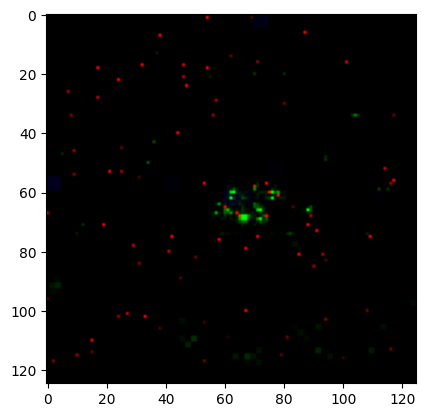

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(final_img)
plt.show()

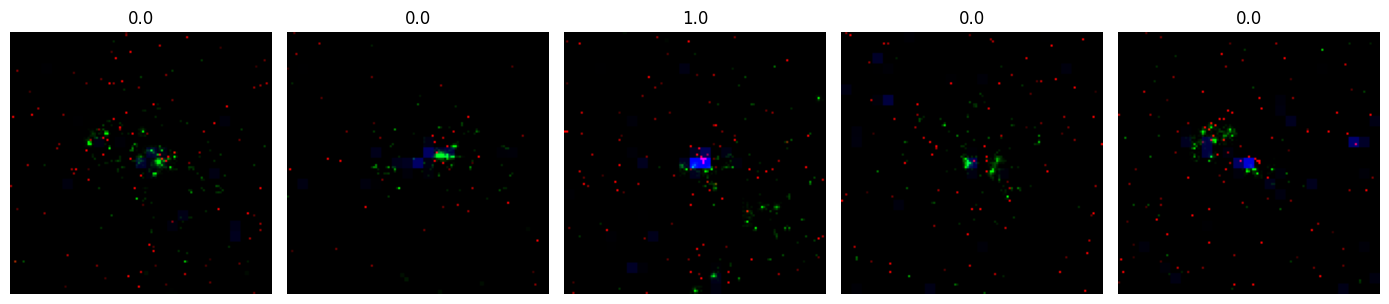

In [ ]:
import random
indices = [random.randint(0,900) for _ in range(5)]

y_5 = batch_df['y'][indices].tolist()
images = [img_list[i] for i in indices]

fig, axes = plt.subplots(1, 5, figsize=(14, 12))

for i, image in enumerate(images):
    axes[i].imshow(image)
    axes[i].set_title(y_5[i]) # fix this
    axes[i].axis('off')

plt.tight_layout()
plt.show()